<ipython-input-3-452a6d9d9d54>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Dates'])


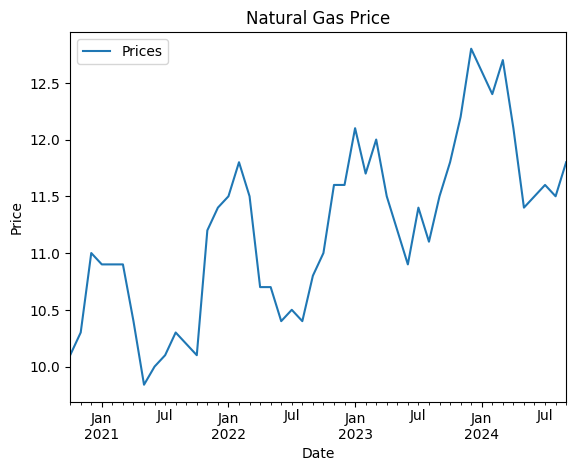

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp31ho8ha3/198e56ex.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp31ho8ha3/h0v5yz9z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50051', 'data', 'file=/tmp/tmp31ho8ha3/198e56ex.json', 'init=/tmp/tmp31ho8ha3/h0v5yz9z.json', 'output', 'file=/tmp/tmp31ho8ha3/prophet_model8okcne0j/prophet_model-20250514040027.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:00:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:00:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


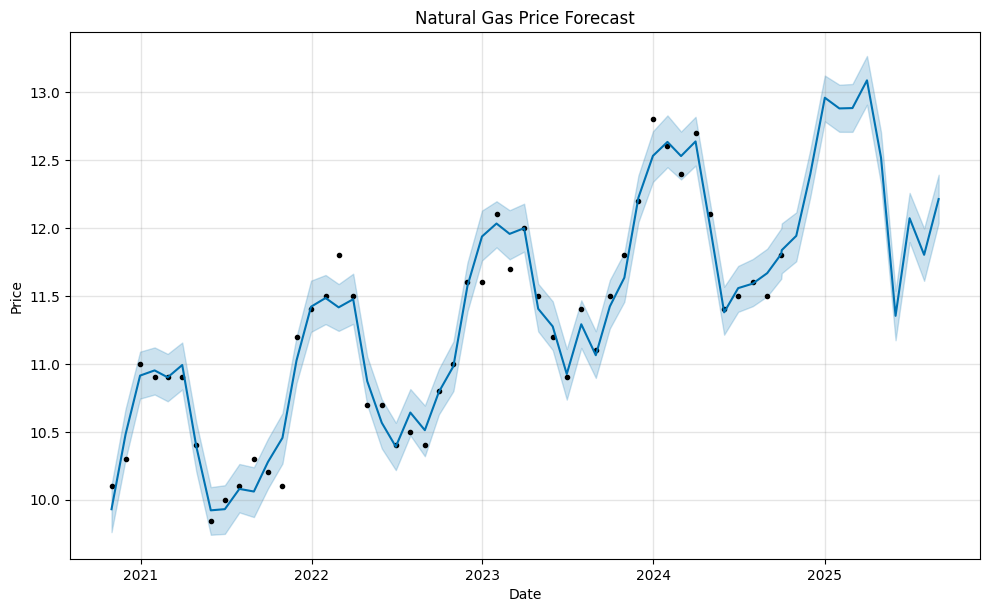

In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv("Nat_Gas.csv")
df['Date'] = pd.to_datetime(df['Dates'])

#ploting the data
df.plot(x='Date', y='Prices', kind='line')
plt.title("Natural Gas Price")
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()

# Prophet requires columns: ds (date) and y (value)
df_prophet = df.rename(columns={'Date': 'ds', 'Prices': 'y'})

# Create and fit model
model = Prophet(yearly_seasonality=True)
model.fit(df_prophet)

# Create future dataframe for 12 more months
future = model.make_future_dataframe(periods=12, freq='MS')

# Forecast
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("Natural Gas Price Forecast")
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()

# Function to get price estimate for any date
def estimate_price(date_str):
    input_date = pd.to_datetime(date_str)

    # Check if date is already in forecast
    if input_date in forecast['ds'].values:
        return forecast[forecast['ds'] == input_date]['yhat'].values[0]
    else:
        # Interpolate between known points if within range
        all_forecast = forecast.set_index('ds')['yhat']
        all_forecast = all_forecast.sort_index().resample('D').interpolate('linear')
        if input_date in all_forecast.index:
            return all_forecast.loc[input_date]
        elif input_date < all_forecast.index[0]:
            return f"Date {input_date.date()} is before available data."
        elif input_date > all_forecast.index[-1]:
            return f"Forecast available only up to {all_forecast.index[-1].date()}"
        else:
            return "Could not estimate."


In [2]:
# Example usage
print("Interpolated price on 2023-07-15:", estimate_price('2023-07-15'))
print("Forecasted price on 2025-06-01:", estimate_price('2025-06-01'))

Interpolated price on 2023-07-15: 11.10156550589556
Forecasted price on 2025-06-01: 11.352768828729507
